# ML Model and Data Analysis

The purpose of the Machine Learning Model is to determine a future method for choosing the correct shoes for the ShoeX Inventory.

In [1]:
# Import Dependencies

# Modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

# Import libararies for metrics
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report 
from sklearn import metrics


# import StandardSclaer and OneHotEncoder
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Import LogisticRegression library
from sklearn.linear_model import LogisticRegression

# Import KNeighborsClasifier library
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

## Data Preperation

In [2]:
# Read Data from StockX Data Contest
cleandata = pd.read_csv('https://raw.githubusercontent.com/saromleang/stockx-dc19/master/StockX-Data-Contest-2019-3.csv')
df = cleandata.copy()

# Set Order Date as Index and convert to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Release Date'] = pd.to_datetime(df['Release Date'])

# Display Data
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Days Since,Profit
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,342,877
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,282,465
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,282,470
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,282,855
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island,202,608


In [3]:
# Describe Data
df.describe()

,Sale Price,Retail Price,Shoe Size,Days Since,Profit
count,99956.000000,99956.00000,99956.000000,99956.000000,99956.000000
mean,446.634719,208.61359,9.344181,183.708722,238.021129
std,255.982969,25.20001,2.329588,232.354142,266.133179
min,186.000000,130.00000,3.500000,-69.000000,-34.000000
25%,275.000000,220.00000,8.000000,10.000000,58.000000
50%,370.000000,220.00000,9.500000,56.000000,154.000000
75%,540.000000,220.00000,11.000000,345.000000,342.000000
max,4050.000000,250.00000,17.000000,1321.000000,3860.000000


In [4]:
# Show Headers
df.columns

Index(['Order Date', 'Brand', 'Sneaker Name', 'Sale Price', 'Retail Price',
       'Release Date', 'Shoe Size', 'Buyer Region', 'Days Since', 'Profit'],
      dtype='object')

In [5]:
# Create a "%"" Column that shows the overall Percentage of Profit per Trade
df["%"] = df['Profit'] / df["Retail Price"]

In [6]:
#Set Profit Margin as a multiple
margin = 1

# Find Profitable Sales and Create New Column Called Profitable to act as a target
df['Profitable'] = (df['%']>= margin )

# Change bool value to integer
df['Profitable'] = df['Profitable'].astype(int)

In [7]:
df

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Days Since,Profit,%,Profitable
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,342,877,3.986364,1
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,282,465,2.113636,1
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,282,470,2.136364,1
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,282,855,3.886364,1
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island,202,608,2.763636,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99951,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565,220,2018-12-26,8.0,Oregon,49,345,1.568182,1
99952,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598,220,2018-12-26,8.5,California,49,378,1.718182,1
99953,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605,220,2018-12-26,5.5,New York,49,385,1.750000,1
99954,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650,220,2018-12-26,11.0,California,49,430,1.954545,1


## Data Analysis

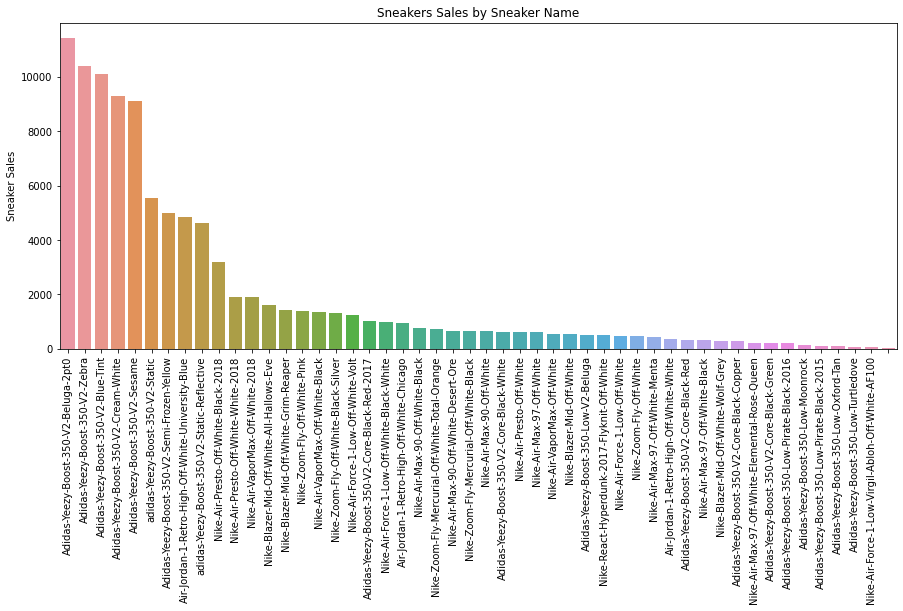

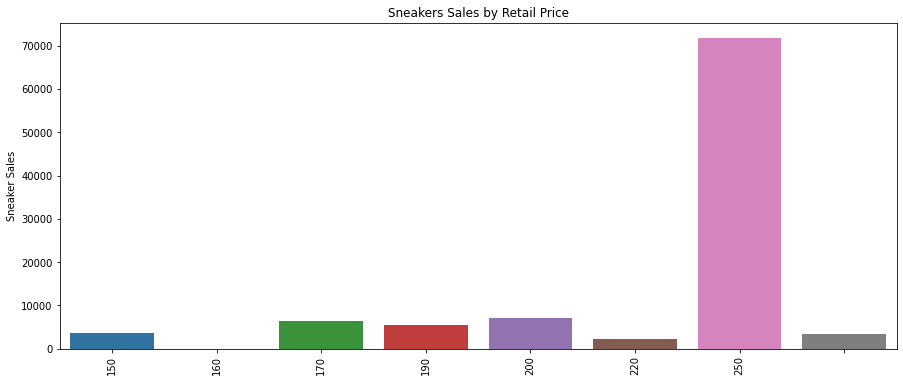

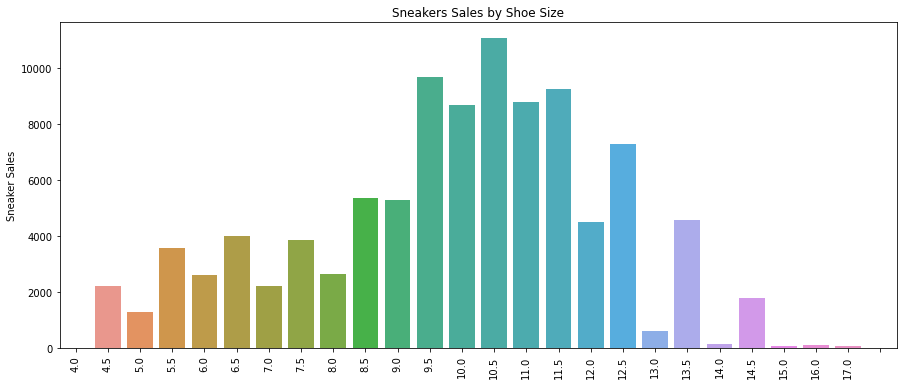

In [8]:
# Distribution analysis to find popular brand, names and shoe sizes for reference.
df_cat = ['Sneaker Name', 'Retail Price', 'Shoe Size' ]
for cat in df_cat:
    cat_num = df[str(cat)].value_counts()
    plt.figure(figsize=(15,6))
    chart = sns.barplot(x = cat_num.index, y= cat_num)
    chart.set_title("Sneakers Sales by %s" % (cat))
    plt.ylabel("Sneaker Sales")
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
    plt.show(15)

# ML Models

In [9]:
# drop the columns we don't want to use in our models
consolidated_df = df.drop(columns=['Order Date','Release Date', 'Buyer Region', 'Brand', 'Sneaker Name'])

# separate the data into features and target
y = consolidated_df["Profitable"]

# y[:5]

# Define Feature Set
X = consolidated_df.drop(columns = "Profitable")

# X.head()

# check the value_counts to see whether there is an oversampling issue
y.value_counts()

0    64046
1    35910
Name: Profitable, dtype: int64

## Split and Scale Data

In [10]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
# Instantiate the random oversampler model
random_oversampler = RandomOverSampler(random_state=1)
# Fit the training data to the random_oversampler model
X_resampled, y_resampled = random_oversampler.fit_resample(X_train, y_train)

y_resampled.value_counts()

1    48000
0    48000
Name: Profitable, dtype: int64

## Logistic Regression

In [12]:
# Instantiate the Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=1)
# Fit the model using the resampled training data
lr_model = logistic_regression_model.fit(X_train_scaled, y_train)
# Make a prediction using the testing data
predictions = logistic_regression_model.predict(X_test)

#Balanced Accuracy
balanced_accuracy_score(y_test, predictions)

0.5

In [13]:
# Confusion Matrix
confusion_matrix(y_test, predictions)

array([[    0, 16046],
       [    0,  8943]])

In [14]:
# Print Classsification report
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.00      0.00      1.00      0.00      0.00      0.00     16046
          1       0.36      1.00      0.00      0.53      0.00      0.00      8943

avg / total       0.13      0.36      0.64      0.19      0.00      0.00     24989



## Logistic Regression Model on Resampled Data

In [15]:
# Instantiate the Logistic Regression model
logistic_regression_model_resampled = LogisticRegression(random_state=1)
# Fit the model using the resampled training data
lr_model_resampled = logistic_regression_model_resampled.fit(X_resampled, y_resampled)
# Make a prediction using the testing data
predictions_oversampled = logistic_regression_model_resampled.predict(X_test)

balanced_accuracy_score(y_test, predictions_oversampled)

1.0

In [16]:
confusion_matrix(y_test, predictions_oversampled)

array([[16046,     0],
       [    0,  8943]])

In [17]:
print(classification_report_imbalanced(y_test, predictions_oversampled))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00     16046
          1       1.00      1.00      1.00      1.00      1.00      1.00      8943

avg / total       1.00      1.00      1.00      1.00      1.00      1.00     24989



# KNN Model Trained on Resampled Data

In [18]:
knn_resampled_model = KNeighborsClassifier(n_neighbors=3) 

knn_resampled_model.fit(X_resampled, y_resampled) 

 # Create predictions
y_pred_knn_resampled = knn_resampled_model.predict(X_test_scaled)

# Review the predictions
y_pred_knn_resampled

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
print(classification_report(y_pred_knn_resampled,y_test)) 

              precision    recall  f1-score   support

           0       1.00      0.64      0.78     24989
           1       0.00      0.00      0.00         0

    accuracy                           0.64     24989
   macro avg       0.50      0.32      0.39     24989
weighted avg       1.00      0.64      0.78     24989



In [20]:
balanced_accuracy_score(y_pred_knn_resampled,y_test)

0.6421225339149226